## Python statistics essential training - 04_02_confidenceintervals

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
poll = pd.read_csv('poll.csv')

In [5]:
poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
vote    1000 non-null object
dtypes: object(1)
memory usage: 7.9+ KB


In [6]:
poll.head()

,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


In [9]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

In [14]:
def sample(brown, n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(1000) < brown, 'Brown', 'Green')})

In [15]:
s = sample(0.51, n=1000)

In [17]:
s.vote.value_counts(normalize=True)

Brown    0.505
Green    0.495
Name: vote, dtype: float64

In [18]:
dist = pd.DataFrame((sample(0.51).vote.value_counts(normalize=True) for i in range(1000)))

In [19]:
dist.head()

,Green,Brown
vote,0.508,0.492
vote,0.497,0.503
vote,0.505,0.495
vote,0.472,0.528
vote,0.501,0.499


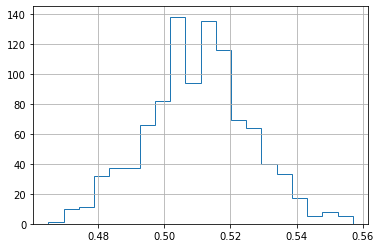

In [21]:
dist.Brown.hist(histtype='step', bins=20);

In [22]:
def samplingdlist(brown, n=1000):
    return pd.DataFrame((sample(brown, n).vote.value_counts(normalize=True) for i in range(1000)))

In [28]:
def quantiles(brown, n=1000):
    dist = samplingdlist(brown, n)
    return dist.Brown.quantile(0.025), dist.Brown.quantile(0.975)
    

In [29]:
quantiles(0.50)

(0.469, 0.532)

In [30]:
quantiles(0.49)

(0.461975, 0.522)

In [31]:
quantiles(0.48)

(0.45, 0.512)

In [32]:
quantiles(0.54)

(0.508, 0.572)

In [33]:
dist = samplingdlist(0.50, 10000)

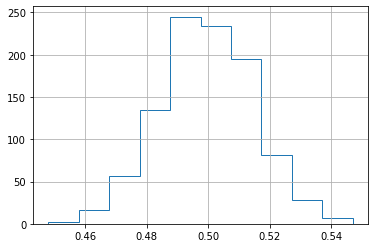

In [34]:
dist.Brown.hist(histtype='step')

In [35]:
largepoll = pd.read_csv('poll-larger.csv')

In [37]:
largepoll.vote.value_counts(normalize=True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64